<a href="https://colab.research.google.com/github/suryapratapkhuntia/Machine_learning_real_world_projects_for_practice/blob/main/placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
df=pd.read_csv('/content/Job_Placement_Data.csv')
df.sample(5)

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
52,F,40.89,Others,45.83,Others,Commerce,53.0,Comm&Mgmt,No,71.2,Mkt&HR,65.49,Not Placed
125,F,84.00,Central,73.00,Central,Commerce,73.0,Comm&Mgmt,No,75.0,Mkt&Fin,73.33,Placed
158,M,67.00,Others,63.00,Others,Science,64.0,Sci&Tech,No,60.0,Mkt&Fin,61.87,Not Placed
14,M,62.00,Central,47.00,Central,Commerce,50.0,Comm&Mgmt,No,76.0,Mkt&HR,54.96,Not Placed
199,M,69.00,Others,65.00,Others,Commerce,57.0,Comm&Mgmt,No,73.0,Mkt&HR,55.80,Placed


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [46]:
df.isnull().sum()

,0
gender,0
ssc_percentage,0
ssc_board,0
hsc_percentage,0
hsc_board,0
hsc_subject,0
degree_percentage,0
undergrad_degree,0
work_experience,0
emp_test_percentage,0


In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


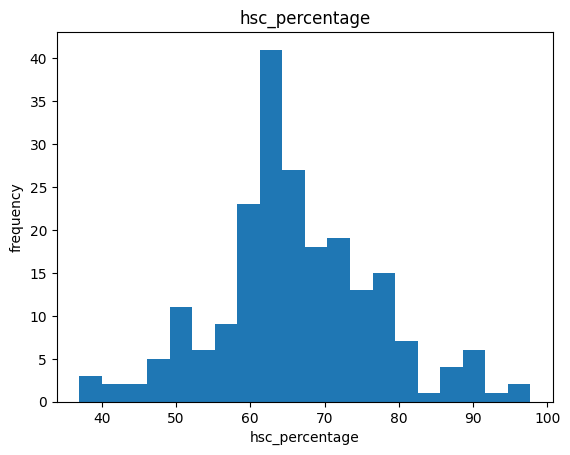

In [49]:
plt.hist(df['hsc_percentage'],bins=20)
plt.title('hsc_percentage')
plt.xlabel('hsc_percentage')
plt.ylabel('frequency')
plt.show()

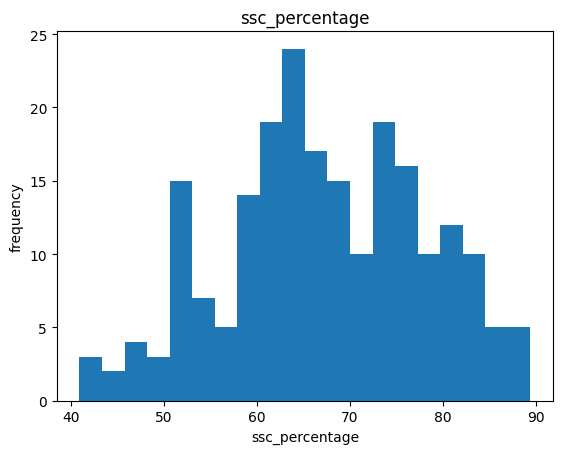

In [50]:
plt.hist(df['ssc_percentage'],bins=20)
plt.title('ssc_percentage')
plt.xlabel('ssc_percentage')
plt.ylabel('frequency')
plt.show()

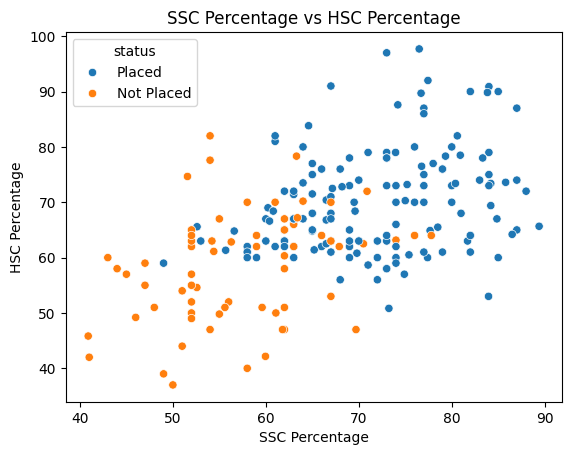

In [51]:
sns.scatterplot(x='ssc_percentage', y='hsc_percentage', data=df, hue='status')
plt.title('SSC Percentage vs HSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('HSC Percentage')
plt.show()

In [52]:
df['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


In [53]:
df['gender'].value_counts()

,count
gender,
M,139
F,76


In [54]:
df['ssc_board'].value_counts()

,count
ssc_board,
Central,116
Others,99


In [55]:
df['hsc_board'].value_counts()

,count
hsc_board,
Others,131
Central,84


In [56]:
df['hsc_subject'].value_counts()

,count
hsc_subject,
Commerce,113
Science,91
Arts,11


In [57]:
df['undergrad_degree'].value_counts()

,count
undergrad_degree,
Comm&Mgmt,145
Sci&Tech,59
Others,11


In [58]:
df['specialisation'].value_counts()

,count
specialisation,
Mkt&Fin,120
Mkt&HR,95


In [59]:
df['work_experience'].value_counts()

,count
work_experience,
No,141
Yes,74


In [60]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [61]:
ordinal_encod=OrdinalEncoder()
df['ssc_board']=ordinal_encod.fit_transform(df[['ssc_board']])
df['hsc_board']=ordinal_encod.fit_transform(df[['hsc_board']])
df['hsc_subject']=ordinal_encod.fit_transform(df[['hsc_subject']])
df['undergrad_degree']=ordinal_encod.fit_transform(df[['undergrad_degree']])
df['specialisation']=ordinal_encod.fit_transform(df[['specialisation']])
df['work_experience']=ordinal_encod.fit_transform(df[['work_experience']])
df['gender']=ordinal_encod.fit_transform(df[['gender']])


In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['status']=le.fit_transform(df['status'])

In [63]:
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1.0,67.00,1.0,91.00,1.0,1.0,58.00,2.0,0.0,55.0,1.0,58.80,1
1,1.0,79.33,0.0,78.33,1.0,2.0,77.48,2.0,1.0,86.5,0.0,66.28,1
2,1.0,65.00,0.0,68.00,0.0,0.0,64.00,0.0,0.0,75.0,0.0,57.80,1
3,1.0,56.00,0.0,52.00,0.0,2.0,52.00,2.0,0.0,66.0,1.0,59.43,0
4,1.0,85.80,0.0,73.60,0.0,1.0,73.30,0.0,0.0,96.8,0.0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,80.60,1.0,82.00,1.0,1.0,77.60,0.0,0.0,91.0,0.0,74.49,1
211,1.0,58.00,1.0,60.00,1.0,2.0,72.00,2.0,0.0,74.0,0.0,53.62,1
212,1.0,67.00,1.0,67.00,1.0,1.0,73.00,0.0,1.0,59.0,0.0,69.72,1
213,0.0,74.00,1.0,66.00,1.0,1.0,58.00,0.0,0.0,70.0,1.0,60.23,1


In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
min_max=MinMaxScaler()
df['ssc_percentage']=min_max.fit_transform(df[['ssc_percentage']])
df['hsc_percentage']=min_max.fit_transform(df[['hsc_percentage']])
df['degree_percentage']=min_max.fit_transform(df[['degree_percentage']])
df['emp_test_percentage']=min_max.fit_transform(df[['emp_test_percentage']])
df['mba_percent']=min_max.fit_transform(df[['mba_percent']])

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
std_scaler=StandardScaler()
df['ssc_percentage']=std_scaler.fit_transform(df[['ssc_percentage']])
df['hsc_percentage']=std_scaler.fit_transform(df[['hsc_percentage']])
df['degree_percentage']=std_scaler.fit_transform(df[['degree_percentage']])
df['emp_test_percentage']=std_scaler.fit_transform(df[['emp_test_percentage']])
df['mba_percent']=std_scaler.fit_transform(df[['mba_percent']])

In [68]:
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1.0,-0.028087,1.0,2.268812,1.0,1.0,-1.140102,2.0,0.0,-1.291091,1.0,-0.597647,1
1,1.0,1.113369,0.0,1.103448,1.0,2.0,1.513267,2.0,1.0,1.087157,0.0,0.687620,1
2,1.0,-0.213238,0.0,0.153313,0.0,0.0,-0.322843,0.0,0.0,0.218908,0.0,-0.769474,1
3,1.0,-1.046417,0.0,-1.318339,0.0,2.0,-1.957362,2.0,0.0,-0.460592,1.0,-0.489396,0
4,1.0,1.712332,0.0,0.668391,0.0,1.0,0.943909,0.0,0.0,1.864806,0.0,-1.164676,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.0,1.230940,1.0,1.441008,1.0,1.0,1.529612,0.0,0.0,1.426906,0.0,2.098321,1
211,1.0,-0.861266,1.0,-0.582513,1.0,2.0,0.766836,2.0,0.0,0.143408,0.0,-1.487711,1
212,1.0,-0.028087,1.0,0.061335,1.0,1.0,0.903046,0.0,1.0,-0.989091,0.0,1.278706,1
213,0.0,0.619941,1.0,-0.030644,1.0,1.0,-1.140102,0.0,0.0,-0.158592,1.0,-0.351934,1


In [69]:
x=df.drop('status',axis=1)
y=df['status']

In [70]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((172, 12), (43, 12), (172,), (43,))

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [80]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()

}

for name,model in models.items():
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(name)
  print(accuracy_score(y_test,y_pred))

Logistic Regression
0.8837209302325582
Support Vector Machine
0.7906976744186046
Decision Tree
0.8372093023255814
Random Forest
0.7906976744186046
K-Nearest Neighbors
0.813953488372093


In [81]:
from sklearn.ensemble import BaggingClassifier

In [83]:
bag_clf=BaggingClassifier(estimator=LogisticRegression(),n_estimators=100,random_state=42)

In [84]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

In [85]:
y_pred=bag_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8604651162790697


In [86]:
log_reg=LogisticRegression()

In [87]:
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8837209302325582
